## CHIP400 Project Implementation; ReadyCare Mobile

1.	USE CASE (Scenario): Improving telehealth access by boosting digital health literacy and readiness in underserved populations.

2.	Problem: Even in areas with internet access, patients—especially low-income or older adults—often lack the digital skills or confidence needed to use telehealth tools, creating a “last-mile” gap in health access.

3.	Target Customer: Medicaid recipients, low-income families, and older adults in North Carolina; partners include FQHCs, hospitals, and public health departments.

4.	Solution (Technology): ReadyCare, a lightweight, mobile-first tool that includes onboarding walkthroughs, interactive simulations, and a chatbot to help users build digital confidence for telehealth appointments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

In [2]:
questions = {
    "q1": "Do you feel confident using a smartphone or tablet?",
    "q2": "Can you join a video call (Zoom/Teams/FaceTime) without help?",
    "q3": "Do you know how to check your internet connection?",
    "q4": "Do you feel comfortable downloading or opening apps?",
    "q5": "Do you know how to adjust volume/microphone settings?",
    "q6": "Do you know how to turn your camera on/off?",
    "q7": "Have you attended a telehealth appointment before?",
    "q8": "Do you have a private, quiet space for appointments?",
    "q9": "Do you have a device with a working camera?",
    "q10": "Do you have reliable internet?"
}

options = {
    "Yes, without help": 2,
    "Yes, but sometimes need help": 1,
    "No": 0
}

In [3]:
responses = {}

print("Telehealth Readiness Assessment")
print("----------------------------------")

for key, q in questions.items():
    print("\n" + q)
    for i, opt in enumerate(options.keys()):
        print(f"{i+1}. {opt}")
    
    while True:
        choice = input("Select 1, 2, or 3: ")
        if choice in ["1", "2", "3"]:
            break
        else:
            print("Invalid choice. Try again.")
    
    selected = list(options.keys())[int(choice)-1]
    responses[key] = options[selected]

responses_df = pd.DataFrame.from_dict(responses, orient="index", columns=["score"])


Telehealth Readiness Assessment
----------------------------------

Do you feel confident using a smartphone or tablet?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  1



Can you join a video call (Zoom/Teams/FaceTime) without help?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  1



Do you know how to check your internet connection?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  1



Do you feel comfortable downloading or opening apps?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  2



Do you know how to adjust volume/microphone settings?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  3



Do you know how to turn your camera on/off?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  2



Have you attended a telehealth appointment before?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  2



Do you have a private, quiet space for appointments?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  3



Do you have a device with a working camera?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  1



Do you have reliable internet?
1. Yes, without help
2. Yes, but sometimes need help
3. No


Select 1, 2, or 3:  1


In [4]:
#scoring logic
total_score = responses_df["score"].sum()
max_score = len(responses_df) * 2
percent = (total_score / max_score) * 100

if percent >= 75:
    readiness = "HIGH readiness"
elif percent >= 40:
    readiness = "MEDIUM readiness"
else:
    readiness = "LOW readiness"

display(Markdown(f"### **Your Telehealth Readiness Score: {percent:.1f}% ({readiness})**"))


### **Your Telehealth Readiness Score: 65.0% (MEDIUM readiness)**

In [5]:
recommendations = {
    "tech_skills": [
        "Practice joining video calls using a simple app like Zoom or FaceTime.",
        "Try tapping each button (camera, mic, settings) to learn what they do."
    ],
    "internet": [
        "Move closer to your Wi-Fi router during appointments.",
        "Ask your clinic about low-cost internet programs."
    ],
    "privacy": [
        "Find a quiet room, or ask your clinic for a private telehealth room."
    ]
}

issues = []

# simple rule-based recommender
if responses["q1"] < 2 or responses["q2"] < 2:
    issues.append("tech_skills")

if responses["q10"] < 2:
    issues.append("internet")

if responses["q8"] < 2:
    issues.append("privacy")

display(Markdown("### **Personalized Recommendations:**"))

for issue in issues:
    for rec in recommendations[issue]:
        display(Markdown(f"- {rec}"))

### **Personalized Recommendations:**

- Find a quiet room, or ask your clinic for a private telehealth room.

In [6]:
np.random.seed(42)

sample = pd.DataFrame({
    q: np.random.choice([0,1,2], size=100, p=[0.2,0.4,0.4])
    for q in questions.keys()
})

sample["total_score"] = sample.sum(axis=1)
sample["readiness_level"] = pd.cut(
    sample["total_score"],
    bins=[-0.1, 6, 14, 20],
    labels=["Low", "Medium", "High"]
)

sample.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,total_score,readiness_level
0,1,0,2,0,0,2,0,1,2,1,9,Medium
1,2,2,0,1,2,1,1,0,0,0,9,Medium
2,2,1,0,1,1,1,0,1,1,0,8,Medium
3,1,1,2,2,2,2,0,0,2,1,13,Medium
4,0,2,2,2,1,2,0,0,1,1,11,Medium


/tmp/ipykernel_588/1767476344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample, x="readiness_level", palette="Blues")


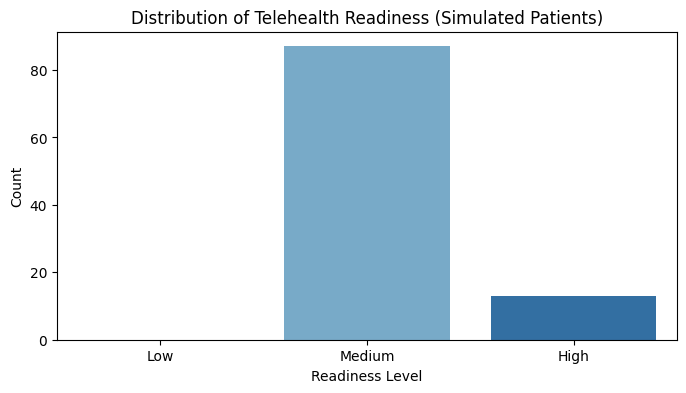

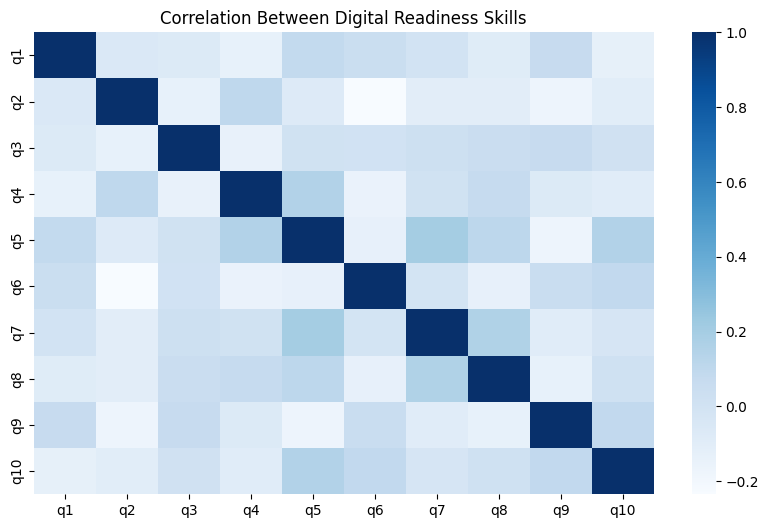

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(data=sample, x="readiness_level", palette="Blues")
plt.title("Distribution of Telehealth Readiness (Simulated Patients)")
plt.xlabel("Readiness Level")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(sample[questions.keys()].corr(), cmap="Blues")
plt.title("Correlation Between Digital Readiness Skills")
plt.show()